In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib as plt
import seaborn as sns

## Load Dataset

In [2]:
skin_df = pd.read_csv('../raw_data/HAM10000_metadata.csv')

In [3]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [4]:
dict_target = {'bkl':0, 'nv':1, 'df':2, 'mel':3, 'vasc':4, 'bcc':5, 'akiec':6}

In [5]:
y = skin_df['dx']

In [6]:
y_num = y.map(dict_target.get)

In [7]:
skin_df['target'] = y_num

In [8]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,target
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,0
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,6
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,6
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,6
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,6


In [9]:
skin_df['path'] = [f'../raw_data/HAM10000_all/{img}.jpg' for img in skin_df['image_id']]

In [10]:
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x)))

In [11]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,target,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,0,../raw_data/HAM10000_all/ISIC_0027419.jpg,"[[[188, 147, 191], [186, 148, 189], [187, 150,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,0,../raw_data/HAM10000_all/ISIC_0025030.jpg,"[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,0,../raw_data/HAM10000_all/ISIC_0026769.jpg,"[[[186, 128, 140], [188, 128, 136], [183, 126,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,0,../raw_data/HAM10000_all/ISIC_0025661.jpg,"[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,0,../raw_data/HAM10000_all/ISIC_0031633.jpg,"[[[122, 80, 102], [124, 82, 104], [127, 83, 10..."
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,6,../raw_data/HAM10000_all/ISIC_0033084.jpg,"[[[103, 79, 95], [109, 78, 93], [106, 80, 89],..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,6,../raw_data/HAM10000_all/ISIC_0033550.jpg,"[[[5, 5, 5], [2, 6, 5], [1, 6, 2], [6, 7, 2], ..."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,6,../raw_data/HAM10000_all/ISIC_0033536.jpg,"[[[101, 86, 91], [109, 90, 94], [107, 94, 101]..."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,6,../raw_data/HAM10000_all/ISIC_0032854.jpg,"[[[155, 113, 135], [156, 112, 135], [157, 114,..."


In [12]:
skin_df['image_resized_kaggle'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

In [46]:
#skin_df['image_resized'] = [np.resize(img, (100,75)) for img in skin_df['image']]

In [51]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,target,path,image,image_resized,image_resized_kaggle
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,0,../raw_data/HAM10000_all/ISIC_0027419.jpg,"[[[188, 147, 191], [186, 148, 189], [187, 150,...","[[188, 147, 191, 186, 148, 189, 187, 150, 191,...","[[[190, 153, 194], [192, 154, 196], [191, 153,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,0,../raw_data/HAM10000_all/ISIC_0025030.jpg,"[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2...","[[25, 15, 23, 25, 14, 22, 25, 14, 22, 25, 14, ...","[[[23, 13, 22], [24, 14, 24], [25, 14, 28], [3..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,0,../raw_data/HAM10000_all/ISIC_0026769.jpg,"[[[186, 128, 140], [188, 128, 136], [183, 126,...","[[186, 128, 140, 188, 128, 136, 183, 126, 133,...","[[[185, 127, 137], [189, 133, 147], [194, 136,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,0,../raw_data/HAM10000_all/ISIC_0025661.jpg,"[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26...","[[24, 9, 16, 22, 11, 15, 23, 11, 15, 26, 11, 1...","[[[24, 11, 17], [26, 13, 22], [38, 21, 32], [5..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,0,../raw_data/HAM10000_all/ISIC_0031633.jpg,"[[[122, 80, 102], [124, 82, 104], [127, 83, 10...","[[122, 80, 102, 124, 82, 104, 127, 83, 106, 13...","[[[134, 90, 113], [147, 102, 125], [159, 115, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,6,../raw_data/HAM10000_all/ISIC_0033084.jpg,"[[[103, 79, 95], [109, 78, 93], [106, 80, 89],...","[[103, 79, 95, 109, 78, 93, 106, 80, 89, 98, 8...","[[[155, 137, 148], [154, 136, 147], [151, 134,..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,6,../raw_data/HAM10000_all/ISIC_0033550.jpg,"[[[5, 5, 5], [2, 6, 5], [1, 6, 2], [6, 7, 2], ...","[[5, 5, 5, 2, 6, 5, 1, 6, 2, 6, 7, 2, 7, 6, 4,...","[[[5, 6, 4], [6, 7, 4], [7, 8, 6], [7, 7, 5], ..."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,6,../raw_data/HAM10000_all/ISIC_0033536.jpg,"[[[101, 86, 91], [109, 90, 94], [107, 94, 101]...","[[101, 86, 91, 109, 90, 94, 107, 94, 101, 105,...","[[[112, 102, 105], [127, 116, 117], [141, 127,..."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,6,../raw_data/HAM10000_all/ISIC_0032854.jpg,"[[[155, 113, 135], [156, 112, 135], [157, 114,...","[[155, 113, 135, 156, 112, 135, 157, 114, 134,...","[[[158, 122, 146], [159, 122, 141], [154, 112,..."


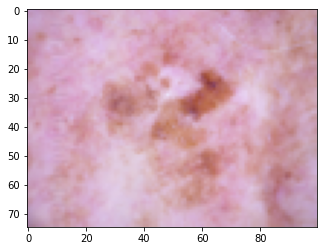

In [13]:
import matplotlib.pyplot as plt
plt.imshow(np.array(skin_df['image_resized_kaggle'][0]))

In [41]:
import cv2
image = skin_df['image']
image_resize = cv2.resize(image,(256,256))

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [14]:
skin_csv = skin_df.to_csv(index=True)

In [15]:
import os
skin_df.to_csv(os.path.join('../raw_data','skin_csv.csv'))

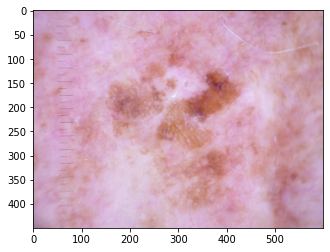

In [17]:
import matplotlib.pyplot as plt
plt.imshow(np.array(skin_df['image'][0]))

In [18]:
skin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   target        10015 non-null  int64  
 8   path          10015 non-null  object 
 9   image         10015 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 782.5+ KB


In [39]:
import ast
import numpy as np
def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))

In [19]:
images = skin_df['path'].map(lambda x: np.asarray(Image.open(x)))

In [23]:
np.array(images).shape

(10015,)

In [32]:
images = np.array(skin_df['image'])

In [25]:
images_new_shape = np.stack(images.values)

In [27]:
images_new_shape.shape

(10015, 450, 600, 3)

In [33]:
np.savetxt("image_array.csv", images, delimiter=",")

TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e')

In [52]:
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y_num, num_classes = 7)

In [53]:
y_cat.shape

(10015, 7)

In [55]:
X = skin_df['image_resized_kaggle']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)

In [57]:
X_train

2399    [[[201, 182, 205], [201, 181, 206], [201, 182,...
8246    [[[251, 200, 245], [254, 203, 252], [253, 203,...
8052    [[[188, 148, 140], [192, 151, 144], [191, 150,...
5840    [[[240, 154, 172], [241, 155, 173], [243, 157,...
3540    [[[231, 172, 173], [234, 175, 177], [236, 176,...
                              ...                        
5734    [[[219, 131, 168], [223, 134, 170], [219, 129,...
5191    [[[228, 142, 167], [226, 139, 165], [228, 142,...
5390    [[[217, 132, 146], [217, 129, 143], [218, 127,...
860     [[[26, 14, 14], [27, 14, 15], [26, 14, 14], [2...
7270    [[[225, 174, 192], [226, 175, 193], [225, 171,...
Name: image_resized_kaggle, Length: 7010, dtype: object

In [58]:
X_train_stack = np.stack(X_train)

In [59]:
X_train_stack.shape

(7010, 75, 100, 3)

## Create Folders

In [90]:
#import shutil

#original = '../raw_data/HAM10000_all/ISIC_0027419.jpg'
#target = '../raw_data/Non_cancer/ISIC_0027419.jpg'
#shutil.copyfile(original, target)

'../raw_data/Non_cancer/ISIC_0027419.jpg'

In [109]:
import shutil

for index, row in skin_df.iterrows():
    image_id = row['image_id']
    original = f'../raw_data/HAM10000_all/{image_id}.jpg'
    if row['target'] == 0:
        target = f'../raw_data/Non_cancer/{image_id}.jpg'
        shutil.copyfile(original, target)
    else:
        target = f'../raw_data/Cancer/{image_id}.jpg'
        shutil.copyfile(original, target)

In [35]:
import shutil

i = 0
for index, row in skin_df.iterrows():
    image_id = row['image_id']
    original = f'../raw_data/HAM10000_all/{image_id}.jpg'
    if (row['target'] != 0) and i < 2000:
        target = f'../raw_data/Categories/Cancer_only_2000/{image_id}.jpg'
        shutil.copyfile(original, target)
        i+=1

## Data Augmentation

In [55]:
belign_df_loca = skin_df[(skin_df['dx'] == 'bkl') |  (skin_df['dx'] == 'df') | (skin_df['dx'] == 'vasc')]
belign_df_loca 

,lesion_id,image_id,dx,dx_type,age,sex,localization,target
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,0
...,...,...,...,...,...,...,...,...
3326,HAM_0002276,ISIC_0025366,bkl,consensus,50.0,female,trunk,0
7100,HAM_0006159,ISIC_0028977,bkl,consensus,50.0,female,upper extremity,0
9546,HAM_0003807,ISIC_0032655,bkl,consensus,40.0,male,unknown,0
9630,HAM_0003807,ISIC_0033620,bkl,consensus,40.0,male,unknown,0


In [56]:
belign_df_loca['path'] = [f'../raw_data/Categories/Non_cancer/{img}.jpg' for img in belign_df_loca ['image_id']]

/var/folders/tj/9gtmrwzd6t34pfxjx7l6byrh0000gn/T/ipykernel_92844/401271127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  belign_df_loca ['path'] = [f'../raw_data/Categories/Non_cancer/{img}.jpg' for img in belign_df_loca ['image_id']]


In [57]:
belign_df_loca

,lesion_id,image_id,dx,dx_type,age,sex,localization,target,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,0,../raw_data/Categories/Non_cancer/ISIC_0027419...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,0,../raw_data/Categories/Non_cancer/ISIC_0025030...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,0,../raw_data/Categories/Non_cancer/ISIC_0026769...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,0,../raw_data/Categories/Non_cancer/ISIC_0025661...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,0,../raw_data/Categories/Non_cancer/ISIC_0031633...
...,...,...,...,...,...,...,...,...,...
3326,HAM_0002276,ISIC_0025366,bkl,consensus,50.0,female,trunk,0,../raw_data/Categories/Non_cancer/ISIC_0025366...
7100,HAM_0006159,ISIC_0028977,bkl,consensus,50.0,female,upper extremity,0,../raw_data/Categories/Non_cancer/ISIC_0028977...
9546,HAM_0003807,ISIC_0032655,bkl,consensus,40.0,male,unknown,0,../raw_data/Categories/Non_cancer/ISIC_0032655...
9630,HAM_0003807,ISIC_0033620,bkl,consensus,40.0,male,unknown,0,../raw_data/Categories/Non_cancer/ISIC_0033620...


In [58]:
belign_df_loca['image'] = belign_df_loca['path'].map(lambda x: np.asarray(Image.open(x)))

/var/folders/tj/9gtmrwzd6t34pfxjx7l6byrh0000gn/T/ipykernel_92844/3522933522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  belign_df_loca['image'] = belign_df_loca ['path'].map(lambda x: np.asarray(Image.open(x)))


In [76]:
belign_df_loca

,lesion_id,image_id,dx,dx_type,age,sex,localization,target,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,0,../raw_data/Categories/Non_cancer/ISIC_0027419...,"[[[188, 147, 191], [186, 148, 189], [187, 150,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,0,../raw_data/Categories/Non_cancer/ISIC_0025030...,"[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,0,../raw_data/Categories/Non_cancer/ISIC_0026769...,"[[[186, 128, 140], [188, 128, 136], [183, 126,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,0,../raw_data/Categories/Non_cancer/ISIC_0025661...,"[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,0,../raw_data/Categories/Non_cancer/ISIC_0031633...,"[[[122, 80, 102], [124, 82, 104], [127, 83, 10..."
...,...,...,...,...,...,...,...,...,...,...
3326,HAM_0002276,ISIC_0025366,bkl,consensus,50.0,female,trunk,0,../raw_data/Categories/Non_cancer/ISIC_0025366...,"[[[233, 190, 197], [237, 190, 200], [236, 189,..."
7100,HAM_0006159,ISIC_0028977,bkl,consensus,50.0,female,upper extremity,0,../raw_data/Categories/Non_cancer/ISIC_0028977...,"[[[122, 92, 81], [127, 93, 91], [130, 95, 93],..."
9546,HAM_0003807,ISIC_0032655,bkl,consensus,40.0,male,unknown,0,../raw_data/Categories/Non_cancer/ISIC_0032655...,"[[[170, 159, 189], [174, 159, 188], [176, 160,..."
9630,HAM_0003807,ISIC_0033620,bkl,consensus,40.0,male,unknown,0,../raw_data/Categories/Non_cancer/ISIC_0033620...,"[[[149, 124, 153], [146, 126, 153], [145, 129,..."


In [89]:
#davy = belign_df_loca.reset_index(drop=True).copy()
#davy

,lesion_id,image_id,dx,dx_type,age,sex,localization,target,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,0,../raw_data/Categories/Non_cancer/ISIC_0027419...,"[[[188, 147, 191], [186, 148, 189], [187, 150,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,0,../raw_data/Categories/Non_cancer/ISIC_0025030...,"[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,0,../raw_data/Categories/Non_cancer/ISIC_0026769...,"[[[186, 128, 140], [188, 128, 136], [183, 126,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,0,../raw_data/Categories/Non_cancer/ISIC_0025661...,"[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,0,../raw_data/Categories/Non_cancer/ISIC_0031633...,"[[[122, 80, 102], [124, 82, 104], [127, 83, 10..."
...,...,...,...,...,...,...,...,...,...,...
1351,HAM_0002276,ISIC_0025366,bkl,consensus,50.0,female,trunk,0,../raw_data/Categories/Non_cancer/ISIC_0025366...,"[[[233, 190, 197], [237, 190, 200], [236, 189,..."
1352,HAM_0006159,ISIC_0028977,bkl,consensus,50.0,female,upper extremity,0,../raw_data/Categories/Non_cancer/ISIC_0028977...,"[[[122, 92, 81], [127, 93, 91], [130, 95, 93],..."
1353,HAM_0003807,ISIC_0032655,bkl,consensus,40.0,male,unknown,0,../raw_data/Categories/Non_cancer/ISIC_0032655...,"[[[170, 159, 189], [174, 159, 188], [176, 160,..."
1354,HAM_0003807,ISIC_0033620,bkl,consensus,40.0,male,unknown,0,../raw_data/Categories/Non_cancer/ISIC_0033620...,"[[[149, 124, 153], [146, 126, 153], [145, 129,..."


In [139]:
images = belign_df_loca['image']

In [182]:
images_new_shape = np.stack(images.values)

In [183]:
images_new_shape.shape

(1356, 450, 600, 3)

In [157]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 10,
    horizontal_flip = True,
    ) 

In [158]:
datagen.fit(images_new_shape)

In [159]:
X_augmented_iterator = datagen.flow(images_new_shape, shuffle=False, batch_size=32)
X_augmented_iterator

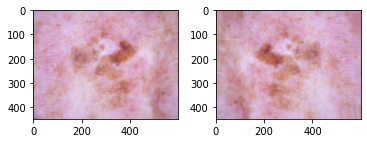

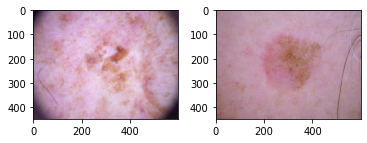

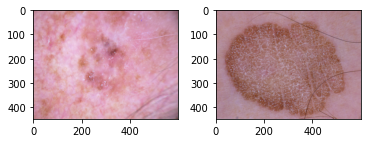

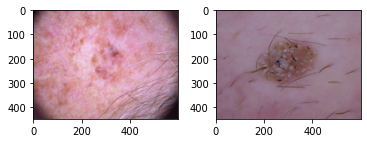

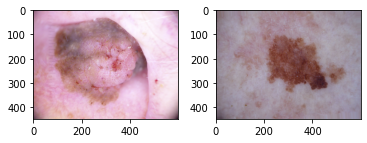

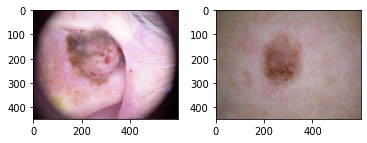

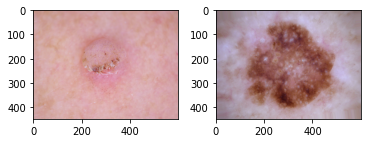

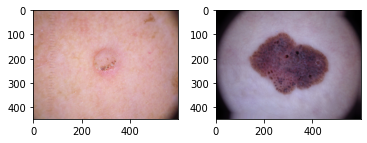

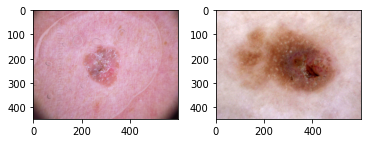

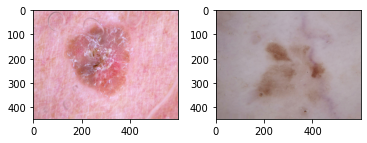

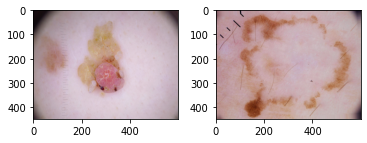

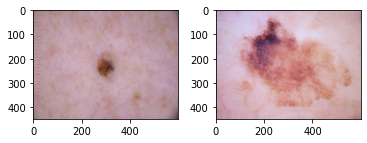

In [160]:
import matplotlib.pyplot as plt

import numpy as np

for i, (raw_image, augmented_image) in enumerate(zip(images, X_augmented_iterator)):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
    ax1.imshow(raw_image)
    ax2.imshow(augmented_image[0].astype('uint8'))
    plt.show()
    
    if i > 10:
        break

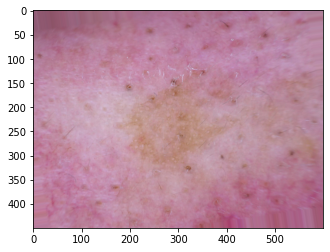

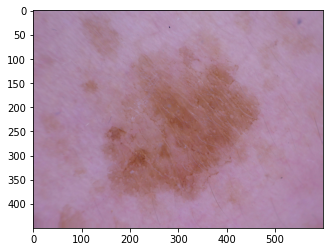

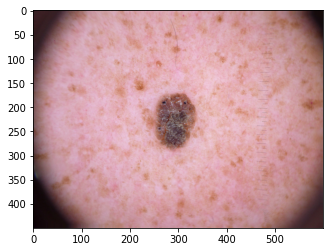

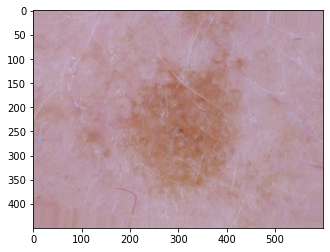

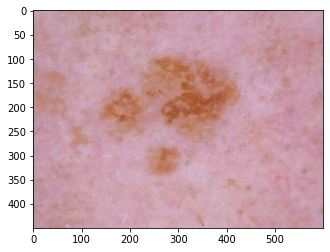

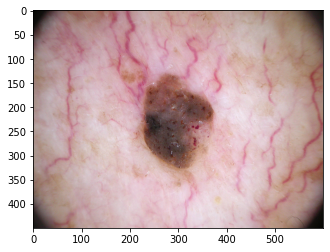

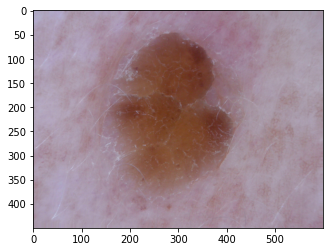

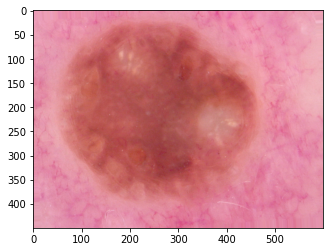

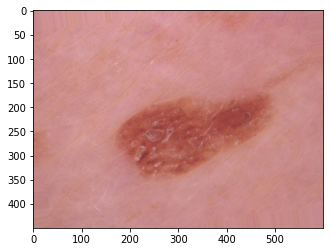

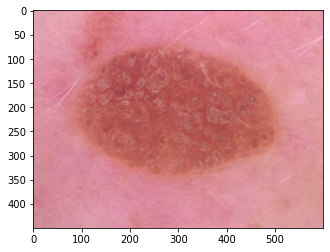

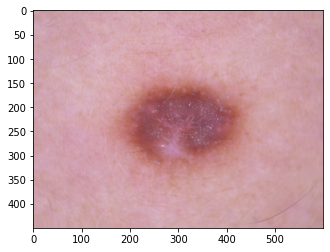

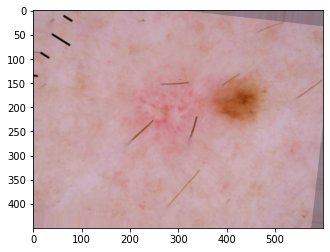

In [162]:
for i, (augmented_image) in enumerate( X_augmented_iterator):
   # _, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
    #ax1.imshow(raw_image)
    #ax2.imshow(augmented_image[0].astype('uint8'))
    plt.imshow(augmented_image[i].astype('uint8'))
    plt.show()
    
    if i > 10:
        break

## New Method for loading data

In [164]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [192]:
import tensorflow as tf
data_dir = '../raw_data/Categories'
train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(64, 64), # resize on the fly, (64,64)
    batch_size=32)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(64, 64), # resize on the fly
    batch_size=32)

Found 3356 files belonging to 2 classes.
Using 2685 files for training.
Found 3356 files belonging to 2 classes.
Using 671 files for validation.


In [193]:
#ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
#                                                         batch_size = 32)

In [194]:
val_ds

<BatchDataset shapes: ((None, 64, 64, 3), (None,)), types: (tf.float32, tf.int32)>

In [195]:
#from tensorflow.keras import models
#from tensorflow.keras import Sequential, layers

# Let's try a dummy model, just to prove that it can fit
#model = Sequential()

# flattens the 
#picture first into a (256*256*3,) vector so it can pass into a Dense layer
#model.add(layers.Flatten(input_shape=(256,256,3))) 
#model.add(layers.Dense(16, activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))
#model.summary()


In [196]:
#model.compile(
#  optimizer = 'adam',
#  loss = 'binary_crossentropy', # "sparse_" allows to avoid one-hot-encoding the target
#  metrics = ['accuracy'])

#model.fit(ds,epochs = 1)

In [31]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Reshape

model = tf.keras.Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1. / 255))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))


In [62]:
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1. / 255))
model.add(layers.Conv2D(16, (3,3), input_shape=(75, 100, 3), padding='same', activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(32, (2,2), padding='same', activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2))) 
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu')) # intermediate layer
model.add(layers.Dense(7, activation='softmax'))

In [63]:
model.compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy', # "sparse_" allows to avoid one-hot-encoding the target
  metrics = ['accuracy'])

model.fit(
    X_train_stack,y_train,
    validation_split=0.2,
    epochs=10,
    batch_size = 32
)

Epoch 1/10
176/176 [==============================] - 6s 31ms/step - loss: 1.0319 - accuracy: 0.6690 - val_loss: 0.9503 - val_accuracy: 0.6961
Epoch 2/10
176/176 [==============================] - 5s 31ms/step - loss: 0.9124 - accuracy: 0.6783 - val_loss: 0.8768 - val_accuracy: 0.6933
Epoch 3/10
176/176 [==============================] - 5s 31ms/step - loss: 0.8523 - accuracy: 0.6956 - val_loss: 0.7924 - val_accuracy: 0.7126
Epoch 4/10
176/176 [==============================] - 5s 30ms/step - loss: 0.7820 - accuracy: 0.7129 - val_loss: 0.7696 - val_accuracy: 0.7304
Epoch 5/10
176/176 [==============================] - 5s 31ms/step - loss: 0.7410 - accuracy: 0.7295 - val_loss: 0.7865 - val_accuracy: 0.7040
Epoch 6/10
176/176 [==============================] - 6s 31ms/step - loss: 0.7048 - accuracy: 0.7470 - val_loss: 0.7768 - val_accuracy: 0.7204
Epoch 7/10
176/176 [==============================] - 5s 31ms/step - loss: 0.6570 - accuracy: 0.7559 - val_loss: 0.7215 - val_accuracy: 0.7247

In [198]:
model.compile(
  optimizer = 'adam',
  loss = 'binary_crossentropy', # "sparse_" allows to avoid one-hot-encoding the target
  metrics = ['accuracy'])

model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
84/84 [==============================] - 7s 72ms/step - loss: 0.6430 - accuracy: 0.6056 - val_loss: 0.6418 - val_accuracy: 0.6364
Epoch 2/20
84/84 [==============================] - 6s 71ms/step - loss: 0.6116 - accuracy: 0.6328 - val_loss: 0.5883 - val_accuracy: 0.6677
Epoch 3/20
84/84 [==============================] - 6s 71ms/step - loss: 0.6048 - accuracy: 0.6503 - val_loss: 0.5789 - val_accuracy: 0.7034
Epoch 4/20
84/84 [==============================] - 6s 70ms/step - loss: 0.5960 - accuracy: 0.6592 - val_loss: 0.5757 - val_accuracy: 0.6870
Epoch 5/20
84/84 [==============================] - 6s 70ms/step - loss: 0.5938 - accuracy: 0.6447 - val_loss: 0.5660 - val_accuracy: 0.7079
Epoch 6/20
84/84 [==============================] - 6s 71ms/step - loss: 0.5885 - accuracy: 0.6588 - val_loss: 0.5650 - val_accuracy: 0.6930
Epoch 7/20
84/84 [==============================] - 6s 72ms/step - loss: 0.5812 - accuracy: 0.6641 - val_loss: 0.5632 - val_accuracy: 0.6990
Epoch 8/20
84

In [240]:
#model from Kaggle notebook

from tensorflow.keras import models
from tensorflow.keras import Sequential, layers

model = tf.keras.Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1. / 255))

model.add(layers.Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(layers.MaxPool2D(pool_size = (2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.40))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [241]:
model.compile(
  optimizer = 'adam',
  loss = 'binary_crossentropy', # "sparse_" allows to avoid one-hot-encoding the target
  metrics = ['accuracy'])

model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
84/84 [==============================] - 14s 160ms/step - loss: 0.7096 - accuracy: 0.5862 - val_loss: 0.6071 - val_accuracy: 0.5872
Epoch 2/20
84/84 [==============================] - 14s 159ms/step - loss: 0.6231 - accuracy: 0.5966 - val_loss: 0.5986 - val_accuracy: 0.5872
Epoch 3/20
84/84 [==============================] - 14s 160ms/step - loss: 0.6127 - accuracy: 0.6056 - val_loss: 0.6033 - val_accuracy: 0.6662
Epoch 4/20
84/84 [==============================] - 14s 158ms/step - loss: 0.6055 - accuracy: 0.6421 - val_loss: 0.5922 - val_accuracy: 0.6736
Epoch 5/20
84/84 [==============================] - 14s 162ms/step - loss: 0.6017 - accuracy: 0.6406 - val_loss: 0.5873 - val_accuracy: 0.6736
Epoch 6/20
84/84 [==============================] - 14s 166ms/step - loss: 0.5962 - accuracy: 0.6480 - val_loss: 0.5812 - val_accuracy: 0.6811
Epoch 7/20
84/84 [==============================] - 14s 169ms/step - loss: 0.5944 - accuracy: 0.6529 - val_loss: 0.5833 - val_accuracy: 0.6706

## VGG16

In [222]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
    
    # $CHALLENGIFY_BEGIN
    
    model = VGG16(weights="imagenet", include_top=False, input_shape=(64, 64, 3))
    
    # $CHALLENGIFY_END
    
    return model

In [223]:
model = load_model()

In [224]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [225]:
def set_nontrainable_layers(model):
    
    # $CHALLENGIFY_BEGIN
    # Set the first layers to be untrainable
    model.trainable = False
    
    # $CHALLENGIFY_END
    
    return model

In [226]:
model = set_nontrainable_layers(model)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [227]:
from tensorflow.keras import layers, models

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainable, and add additional trainable layers on top'''
    # $CHALLENGIFY_BEGIN
    base_model = set_nontrainable_layers(model)
    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(1, activation='sigmoid')
    
    
    model = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
    # $CHALLENGIFY_END
    return model

In [228]:
model = add_last_layers(model)
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_10 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 500)               1024500   
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 501       
Total params: 15,739,689
Trainable params: 1,025,001
Non-trainable params: 14,714,688
_________________________________________________________________


In [229]:
from tensorflow.keras import optimizers

def build_model():
    # $CHALLENGIFY_BEGIN    
    model = load_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model
    # $CHALLENGIFY_END

In [230]:
model = build_model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_11 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 500)               1024500   
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 501       
Total params: 15,739,689
Trainable params: 1,025,001
Non-trainable params: 14,714,688
_________________________________________________________________


In [231]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
84/84 [==============================] - 60s 705ms/step - loss: 2.0690 - accuracy: 0.5870 - val_loss: 1.4362 - val_accuracy: 0.5887
Epoch 2/20
84/84 [==============================] - 65s 777ms/step - loss: 0.8720 - accuracy: 0.7065 - val_loss: 1.4657 - val_accuracy: 0.6200
Epoch 3/20
84/84 [==============================] - 68s 805ms/step - loss: 0.5520 - accuracy: 0.7955 - val_loss: 1.3368 - val_accuracy: 0.6185
Epoch 4/20
84/84 [==============================] - 68s 801ms/step - loss: 0.3735 - accuracy: 0.8477 - val_loss: 1.3892 - val_accuracy: 0.6185
Epoch 5/20
84/84 [==============================] - 69s 822ms/step - loss: 0.2916 - accuracy: 0.8827 - val_loss: 1.2750 - val_accuracy: 0.6200
Epoch 6/20
84/84 [==============================] - 69s 816ms/step - loss: 0.1915 - accuracy: 0.9277 - val_loss: 1.2424 - val_accuracy: 0.6349
Epoch 7/20
84/84 [==============================] - 68s 812ms/step - loss: 0.1464 - accuracy: 0.9475 - val_loss: 1.2527 - val_accuracy: 0.6453

KeyboardInterrupt: 

## Old Data Prep

In [99]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,target
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,0
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,1
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,1
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,1
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,1


In [ ]:
for 

In [71]:
skin_df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [72]:
skin_df['path'] = [f'../raw_data/HAM10000_all/{img}.jpg' for img in skin_df['image_id']]

In [73]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_all/ISIC_0031633.jpg
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033084.jpg
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033550.jpg
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033536.jpg
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../raw_data/HAM10000_all/ISIC_0032854.jpg


In [74]:
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x)))

In [75]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0027419.jpg,"[[[188, 147, 191], [186, 148, 189], [187, 150,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025030.jpg,"[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0026769.jpg,"[[[186, 128, 140], [188, 128, 136], [183, 126,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025661.jpg,"[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_all/ISIC_0031633.jpg,"[[[122, 80, 102], [124, 82, 104], [127, 83, 10..."


In [76]:
skin_df['image'][0].shape

(450, 600, 3)

In [12]:
np.resize(skin_df['image'][0], (244,244,3))

array([[[188, 147, 191],
        [186, 148, 189],
        [187, 150, 191],
        ...,
        [214, 173, 207],
        [216, 168, 206],
        [218, 167, 208]],

       [[217, 171, 208],
        [218, 173, 206],
        [214, 172, 208],
        ...,
        [190, 138, 161],
        [188, 133, 154],
        [191, 132, 152]],

       [[186, 131, 152],
        [189, 131, 153],
        [192, 133, 151],
        ...,
        [209, 158, 189],
        [208, 159, 189],
        [206, 156, 185]],

       ...,

       [[195, 132, 159],
        [193, 135, 159],
        [193, 138, 159],
        ...,
        [218, 172, 200],
        [218, 169, 199],
        [221, 172, 202]],

       [[216, 170, 199],
        [216, 170, 199],
        [216, 170, 199],
        ...,
        [219, 176, 204],
        [219, 179, 205],
        [220, 178, 202]],

       [[220, 178, 202],
        [219, 177, 197],
        [218, 177, 195],
        ...,
        [223, 188, 220],
        [220, 185, 218],
        [221, 186, 218]]

In [13]:
skin_df['image_resized'] = [np.resize(img, (244,244,3)) for img in skin_df['image']]

In [14]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image,image_resized
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0027419.jpg,"[[[188, 147, 191], [186, 148, 189], [187, 150,...","[[[188, 147, 191], [186, 148, 189], [187, 150,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025030.jpg,"[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2...","[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0026769.jpg,"[[[186, 128, 140], [188, 128, 136], [183, 126,...","[[[186, 128, 140], [188, 128, 136], [183, 126,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025661.jpg,"[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26...","[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_all/ISIC_0031633.jpg,"[[[122, 80, 102], [124, 82, 104], [127, 83, 10...","[[[122, 80, 102], [124, 82, 104], [127, 83, 10..."


In [15]:
skin_df.drop(columns=['image'], inplace = True)

In [16]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image_resized
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0027419.jpg,"[[[188, 147, 191], [186, 148, 189], [187, 150,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025030.jpg,"[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0026769.jpg,"[[[186, 128, 140], [188, 128, 136], [183, 126,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025661.jpg,"[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_all/ISIC_0031633.jpg,"[[[122, 80, 102], [124, 82, 104], [127, 83, 10..."
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033084.jpg,"[[[103, 79, 95], [109, 78, 93], [106, 80, 89],..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033550.jpg,"[[[5, 5, 5], [2, 6, 5], [1, 6, 2], [6, 7, 2], ..."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033536.jpg,"[[[101, 86, 91], [109, 90, 94], [107, 94, 101]..."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../raw_data/HAM10000_all/ISIC_0032854.jpg,"[[[155, 113, 135], [156, 112, 135], [157, 114,..."


In [17]:
skin_df['image_resized'] = skin_df['image_resized']/255

In [18]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image_resized
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0027419.jpg,"[[[0.7372549019607844, 0.5764705882352941, 0.7..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025030.jpg,"[[[0.09803921568627451, 0.058823529411764705, ..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0026769.jpg,"[[[0.7294117647058823, 0.5019607843137255, 0.5..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025661.jpg,"[[[0.09411764705882353, 0.03529411764705882, 0..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_all/ISIC_0031633.jpg,"[[[0.47843137254901963, 0.3137254901960784, 0...."


In [19]:
X = pd.DataFrame(skin_df['image_resized'])

In [20]:
X.head()

0    [[[0.7372549019607844, 0.5764705882352941, 0.7...
1    [[[0.09803921568627451, 0.058823529411764705, ...
2    [[[0.7294117647058823, 0.5019607843137255, 0.5...
3    [[[0.09411764705882353, 0.03529411764705882, 0...
4    [[[0.47843137254901963, 0.3137254901960784, 0....
Name: image_resized, dtype: object

In [21]:
y = skin_df['dx']

In [22]:
y

0          bkl
1          bkl
2          bkl
3          bkl
4          bkl
         ...  
10010    akiec
10011    akiec
10012    akiec
10013    akiec
10014      mel
Name: dx, Length: 10015, dtype: object

In [23]:
y.unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

In [24]:
dict_target = {'bkl':1, 'nv':2, 'df':3, 'mel':4, 'vasc':5, 'bcc':6, 'akiec':7}

In [25]:
y_num = y.map(dict_target.get)

In [26]:
y_num

0        1
1        1
2        1
3        1
4        1
        ..
10010    7
10011    7
10012    7
10013    7
10014    4
Name: dx, Length: 10015, dtype: int64

In [27]:
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y_num, num_classes = 8)

In [28]:
y_cat

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)

In [30]:
X_train.shape

(7010,)

In [31]:
X_test.shape

(3005,)

## Data Analysis Plots

In [32]:
belign_df = skin_df[(skin_df['dx'] == 'bkl') |  (skin_df['dx'] == 'df') | (skin_df['dx'] == 'vasc')]['age']

In [33]:
tumor_df = skin_df[(skin_df['dx'] != 'bkl') |  (skin_df['dx'] != 'df') | (skin_df['dx'] != 'vasc')]['age']

In [34]:
import seaborn as sns

<AxesSubplot:xlabel='age', ylabel='Count'>

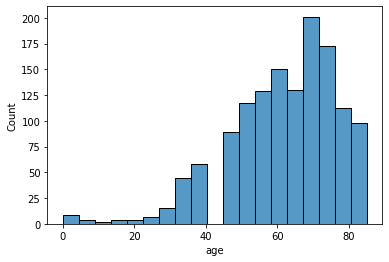

In [35]:
sns.histplot(data = belign_df)

<AxesSubplot:xlabel='age', ylabel='Count'>

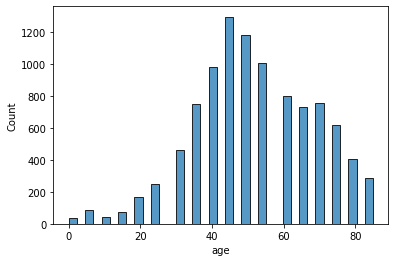

In [36]:
sns.histplot(data = tumor_df)

<AxesSubplot:xlabel='dx', ylabel='Count'>

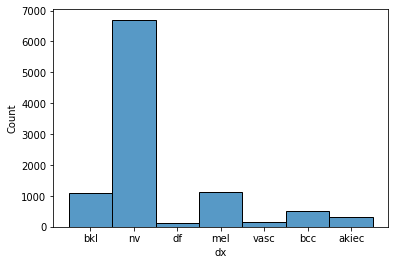

In [37]:
sns.histplot(data = skin_df['dx'])

In [38]:
belign_df_loca = skin_df[(skin_df['dx'] == 'bkl') |  (skin_df['dx'] == 'df') | (skin_df['dx'] == 'vasc')]['localization'
                                                                                                         ]

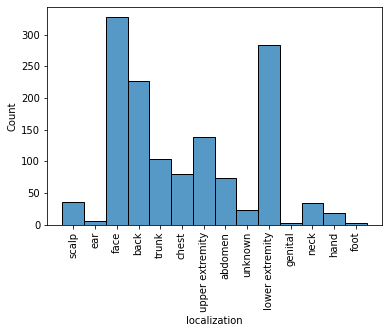

In [39]:

ax = sns.histplot(data = belign_df_loca)
ax.tick_params(axis='x', rotation=90)

In [40]:
tumor_df_loca = skin_df[(skin_df['dx'] != 'bkl') |  (skin_df['dx'] != 'df') | (skin_df['dx'] != 'vasc')]['localization']


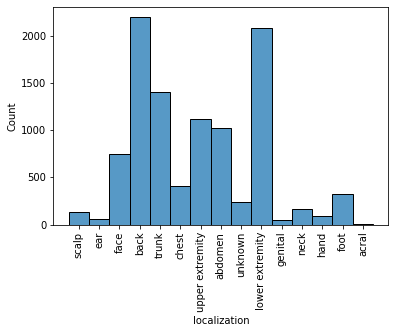

In [41]:
ax = sns.histplot(data = tumor_df_loca)
ax.tick_params(axis='x', rotation=90)

In [43]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image_resized
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0027419.jpg,"[[[0.7372549019607844, 0.5764705882352941, 0.7..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025030.jpg,"[[[0.09803921568627451, 0.058823529411764705, ..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0026769.jpg,"[[[0.7294117647058823, 0.5019607843137255, 0.5..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025661.jpg,"[[[0.09411764705882353, 0.03529411764705882, 0..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_all/ISIC_0031633.jpg,"[[[0.47843137254901963, 0.3137254901960784, 0...."
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033084.jpg,"[[[0.403921568627451, 0.30980392156862746, 0.3..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033550.jpg,"[[[0.0196078431372549, 0.0196078431372549, 0.0..."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033536.jpg,"[[[0.396078431372549, 0.33725490196078434, 0.3..."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../raw_data/HAM10000_all/ISIC_0032854.jpg,"[[[0.6078431372549019, 0.44313725490196076, 0...."


In [44]:
skin_df2 = pd.read_csv('../raw_data/HAM10000_metadata.csv')

In [50]:
skin_df2.drop_duplicates(subset = 'lesion_id', inplace = True)

In [51]:
skin_df2

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back
...,...,...,...,...,...,...,...
9994,HAM_0000193,ISIC_0030877,akiec,histo,60.0,female,face
10001,HAM_0000020,ISIC_0031922,akiec,histo,60.0,female,face
10004,HAM_0005579,ISIC_0029309,akiec,histo,80.0,male,face
10008,HAM_0001576,ISIC_0033705,akiec,histo,60.0,male,face


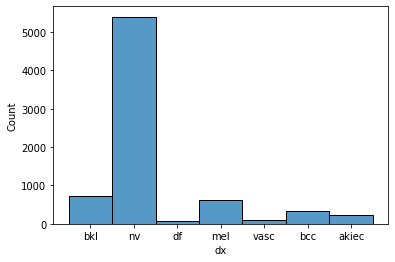

In [52]:
ax = sns.histplot(data =skin_df2['dx'])

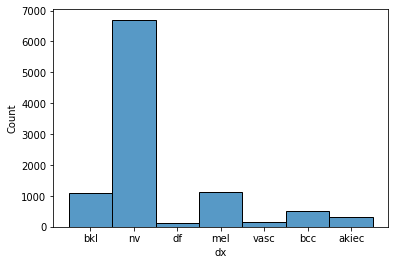

In [53]:
ax = sns.histplot(data =skin_df['dx'])

## Baseline 

In [6]:
#has to be adapted to dataset used

skin_df = pd.read_csv('../raw_data/HAM10000_metadata.csv')

In [7]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [8]:
dict_target = {'bkl':0, 'nv':1, 'df':0, 'mel':1, 'vasc':0, 'bcc':1, 'akiec':1}

In [10]:
y = skin_df['dx']

In [11]:
y_num = y.map(dict_target.get)
y_num

0        0
1        0
2        0
3        0
4        0
        ..
10010    1
10011    1
10012    1
10013    1
10014    1
Name: dx, Length: 10015, dtype: int64

In [12]:
skin_df['target'] = y_num

In [13]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,target
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,0
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,1
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,1
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,1
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,1


In [14]:
X = skin_df.drop(columns = ('target'))
y = skin_df['target']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
y_train

2399    0
8246    1
8052    1
5840    1
3540    1
       ..
5734    1
5191    1
5390    1
860     0
7270    1
Name: target, Length: 7010, dtype: int64

In [27]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
accuracy = dummy_clf.score(X_test, y_test)
#use F1 instead of recall -> more categories not binary
recall = recall_score(y_test, y_pred, average = 'binary')

In [28]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [29]:
y_test

1617    1
8128    1
2168    1
1090    0
7754    1
       ..
4635    1
8386    1
3707    1
1839    1
1995    1
Name: target, Length: 3005, dtype: int64

In [30]:
recall

1.0

In [31]:
accuracy

0.859567387687188